# Analyse descriptive

In [38]:
%load_ext autoreload
%autoreload
%reload_ext autoreload

import logging
import sys

sys.path.insert(0, '../')
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lib import utils
from lib.constant import Datasets, to_csv_kwargs, read_csv_kwargs
from lib.features.dtypes import dtypes_featured, dtypes_clean

get_path_interim = '../data/interim/accidents/{}.csv'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analyse univariée

### Accidents

In [7]:
acc_df = utils.get_dataset(get_path_interim(Datasets.ACCIDENTS), 
                           dtypes=dtypes_featured(Datasets.ACCIDENTS, base_path='../'))
acc_df

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (9,11,12,13,18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/interim/accidents/accidents.csv: 323782 lines loaded (45.70)Mb


,Num_Acc,year,month,day,lum,agg,int,atm,col,com,...,surf,infra,situ,vma,inj_hosp,inj_light,killed,safe,victims_nb,acc_severity
0,200500000001,2005,1,12,3,2,1,1.0,3.0,11,...,1.0,0.0,1.0,NaN,1.0,1.0,0.0,4.0,6.0,inj_hosp
1,200500000002,2005,1,21,1,2,1,1.0,1.0,51,...,1.0,0.0,5.0,NaN,1.0,0.0,0.0,1.0,2.0,inj_hosp
2,200500000003,2005,1,21,3,1,1,2.0,1.0,51,...,2.0,0.0,5.0,NaN,1.0,0.0,0.0,1.0,2.0,inj_hosp
3,200500000004,2005,1,4,1,1,1,1.0,5.0,82,...,1.0,0.0,1.0,NaN,2.0,2.0,0.0,0.0,4.0,inj_hosp
4,200500000005,2005,1,10,3,1,1,3.0,6.0,478,...,2.0,0.0,3.0,NaN,1.0,1.0,0.0,0.0,2.0,inj_hosp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323777,201600059428,2016,12,1,1,2,1,1.0,6.0,611,...,1.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,2.0,inj_light
323778,201600059429,2016,12,3,1,2,1,1.0,7.0,611,...,1.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,inj_light
323779,201600059430,2016,12,5,1,2,1,1.0,3.0,611,...,0.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,2.0,inj_light
323780,201600059431,2016,12,6,1,2,3,1.0,3.0,611,...,1.0,0.0,1.0,NaN,0.0,2.0,0.0,0.0,2.0,inj_light


<AxesSubplot:xlabel='acc_severity'>

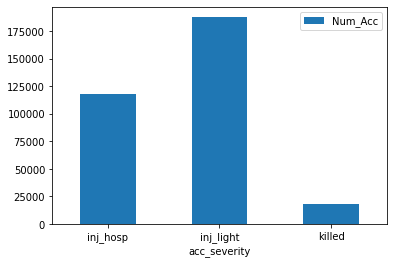

In [12]:
acc_df.groupby(by=['acc_severity']).count()[['Num_Acc']].plot.bar(rot=0)

In [14]:
acc_df[['victims_nb']].describe()

,victims_nb
count,323782.000000
mean,2.254872
std,1.231144
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,69.000000


<AxesSubplot:>

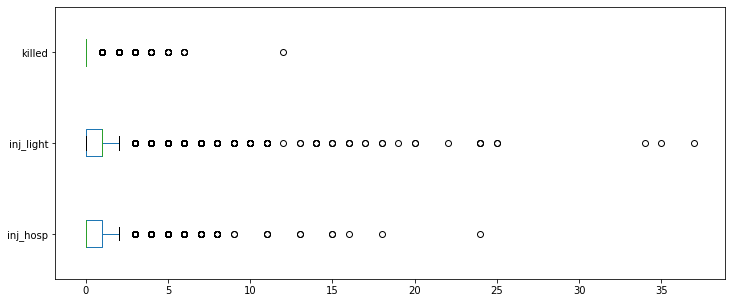

In [22]:
acc_df[['inj_hosp', 'inj_light', 'killed']].plot.box(vert=False, figsize=(12, 5))

<AxesSubplot:xlabel='year'>

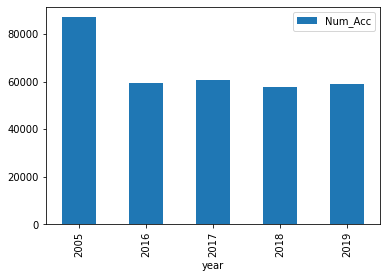

In [23]:
acc_df.groupby(by=['year']).count()[['Num_Acc']].plot.bar()

<AxesSubplot:xlabel='month'>

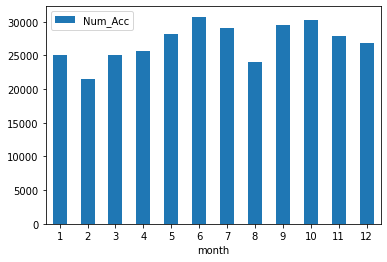

In [27]:
acc_df.groupby(by=['month']).count()[['Num_Acc']].plot.bar(rot=0)

<AxesSubplot:xlabel='weekday'>

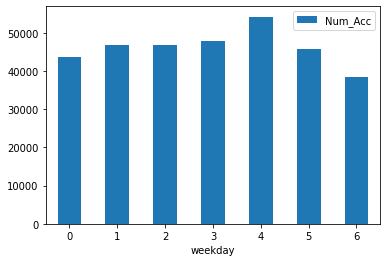

In [26]:
acc_df.groupby(by=['weekday']).count()[['Num_Acc']].plot.bar(rot=0)

**Conditions atmosphériques :**

- -1 – Non renseigné
- 1 – Normale
- 2 – Pluie légère
- 3 – Pluie forte
- 4 – Neige - grêle
- 5 – Brouillard - fumée
- 6 – Vent fort - tempête
- 7 – Temps éblouissant
- 8 – Temps couvert
- 9 – Autre

<AxesSubplot:xlabel='atm'>

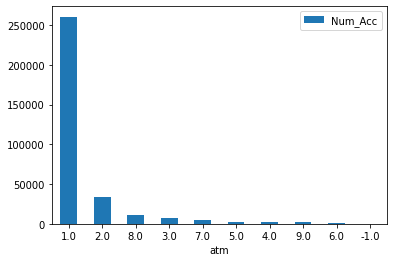

In [33]:
acc_df.groupby(by=['atm']).count().sort_values('Num_Acc', ascending=False)[['Num_Acc']].plot.bar(rot=0)